In [8]:
!rm -rf ./data/MNIST

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.functional as F
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(0.5, 0.5)])

batch_size = 4

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = [i for i in range(0, 10)]

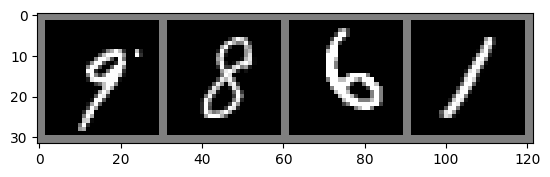

9 8 6 1


In [4]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]}' for j in range(batch_size)))

In [5]:
import classifier
net = classifier.Net()

In [6]:
classifier.train_model(net, trainloader)

0.7125406265258789

In [7]:
torch.save(net.state_dict(), "./classifier.pth")

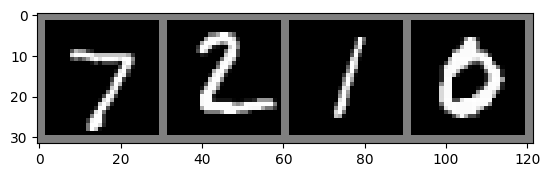

Ground Truth:  7 2 1 0


In [24]:
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print("Ground Truth: ", ' '.join(f'{classes[labels[j]]}' for j in range(4)))

In [25]:
net = classifier.Net()
net.load_state_dict(torch.load("./classifier.pth"))

<All keys matched successfully>

In [8]:
outputs = net(images)

In [9]:
_, predicted = torch.max(outputs, 1)

print("Predicted: ", ' '.join(f'{predicted[j]}' for j in range(4)))

Predicted:  9 8 6 1


In [10]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)

        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)

        correct += (predicted == labels).sum().item()

print(f"Accuracy of the good network on the 10000 test images: {100 * correct // total}%")

Accuracy of the good network on the 10000 test images: 93%
